In [1]:
import pandas as pd

In [2]:
pd.options.display.max_columns = None

# 311 Power Outage Data

In [90]:
df = pd.read_csv('311_power_outage_complaints_nov_13.csv', low_memory=False)

In [94]:
# convert time value to datetime

df['Created Date'] = pd.to_datetime(df['Created Date'])
df['Closed Date'] = pd.to_datetime(df['Closed Date'])

In [97]:
df_count_per_zip = df['Incident Zip'].value_counts().to_frame().reset_index()

df_count_per_zip.rename(columns = {'index':'zipcode', 'Incident Zip':'outage_count'}, inplace = True)

df_count_per_zip

,zipcode,outage_count
0,11226.0,1547
1,10467.0,1240
2,11207.0,1224
3,10457.0,1142
4,11208.0,1102
...,...,...
174,10004.0,2
175,11005.0,2
176,10118.0,2
177,10069.0,1


In [104]:
# Convert zip code count into percentage (weight by population)

df_nyc_zip = pd.read_csv('df_nyc_zip.csv')
df_count_percent = pd.merge(df_count_per_zip, df_nyc_zip, how="inner", left_on="zipcode", right_on="Zipcode")
df_count_percent["outage_pct"] = df_count_percent.outage_count / df_count_percent.Estimate * 100

# df_count_percent.to_csv("311_complaints_by_zip_pop_adjusted.csv")

/var/folders/_c/dcjy1m9109bd_sq8l8j8zsdr0000gn/T/ipykernel_61450/304471784.py:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_zip = df.groupby(by=['Incident Zip']).mean().sort_values(by=['Days to Resolve'],
/var/folders/_c/dcjy1m9109bd_sq8l8j8zsdr0000gn/T/ipykernel_61450/304471784.py:15: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_median = df.groupby(by=['Incident Zip']).median().sort_values(by=['Days to Resolve'],


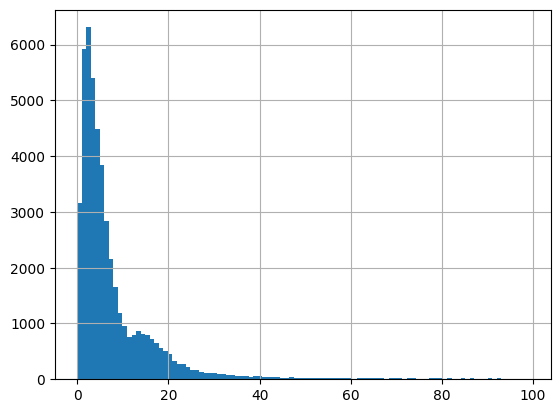

In [105]:
# Explore distribution of time it took to address outage report.

df['Created Datetime'] = pd.to_datetime(df['Created Date'])
df['Closed Datetime'] = pd.to_datetime(df['Closed Date'])

df['Days to Resolve'] = (df['Closed Datetime'] - df['Created Datetime']).dt.days

df[df['Days to Resolve'] < 100]['Days to Resolve'].hist(bins=100)

df['Incident Zip'] = df['Incident Zip'].astype(str).str.replace('.0', '', regex=False)

df_zip = df.groupby(by=['Incident Zip']).mean().sort_values(by=['Days to Resolve'],
                                     ascending=False)[['Days to Resolve']]

df_median = df.groupby(by=['Incident Zip']).median().sort_values(by=['Days to Resolve'],
                                     ascending=False)[['Days to Resolve']]

df_count_days_by_zip = df_zip.merge(df_zip_count, on='Incident Zip')

df_count_days_by_zip = df_count_days_by_zip.rename(columns={'Unique Key': 'Count'})

df_count_median_days = df_median.merge(df_zip_count, on='Incident Zip')

df_count_median_days = df_count_median_days.rename(columns={'Unique Key': 'Count'})

# df_count_median_days.to_csv('count_median_days.csv')

df_count_median_days = df_count_median_days.reset_index()

df_count_median_days = df_count_median_days[df_count_median_days['Incident Zip'] != 'nan']

df_count_median_days['Incident Zip'] = df_count_median_days['Incident Zip'].astype(int)

# df_count_days_by_zip

# df_count_days_by_zip.to_csv('count_days_by_zip.csv')